# Задание по теме «Pandas»

### Задание 1
На основании датасета для каждого покупателя получите:

* предпочитаемый метод оплаты;
* общие траты;
* количество денег, потраченных на дополнительные услуги и аксессуары.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

# Посмотрим что загрузилось
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [3]:
# Основная информация
print("Размер данных:", df.shape)
print("\nСтолбцы:", df.columns.tolist())
print("\nПервые 5 строк:")
df.head()

Размер данных: (20000, 16)

Столбцы: ['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU', 'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price', 'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased', 'Add-on Total']

Первые 5 строк:


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [4]:
# Типы данных и пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [5]:
# Статистика по числовым столбцам
df.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [9]:
# Правильные названия столбцов: 'Customer ID' и 'Payment Method'
preferred_payment = df.groupby('Customer ID')['Payment Method'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

print("Предпочитаемый метод оплаты для первых 10 покупателей:")
preferred_payment.head(10)

Предпочитаемый метод оплаты для первых 10 покупателей:


Customer ID
1000    Credit Card
1002           Cash
1003           Cash
1004    Credit Card
1005     Debit Card
1006           Cash
1007    Credit Card
1008           Cash
1011    Credit Card
1013         Paypal
Name: Payment Method, dtype: object

In [10]:
# Общие траты каждого покупателя
# 'Total Price' - общая сумма заказа
total_spent = df.groupby('Customer ID')['Total Price'].sum()

print("Общие траты первых 10 покупателей:")
total_spent.head(10)

Общие траты первых 10 покупателей:


Customer ID
1000     6279.42
1002     5020.60
1003       41.50
1004       83.00
1005    11779.11
1006    12184.27
1007     7120.71
1008     3379.32
1011     7911.90
1013     5538.33
Name: Total Price, dtype: float64

In [11]:
# Дополнительные услуги: 'Add-on Total' - сумма за доп. услуги
accessory_spent = df.groupby('Customer ID')['Add-on Total'].sum()

print("Траты на доп. услуги первых 10 покупателей:")
accessory_spent.head(10)

Траты на доп. услуги первых 10 покупателей:


Customer ID
1000     66.30
1002     60.16
1003     35.56
1004     65.78
1005     75.33
1006    133.43
1007     55.48
1008     65.85
1011     70.17
1013     57.81
Name: Add-on Total, dtype: float64

In [12]:
# Собираем всё в одну таблицу
customer_analysis = pd.DataFrame({
    'preferred_payment': preferred_payment,
    'total_spent': total_spent,
    'accessory_spent': accessory_spent
}).fillna(0)  # Заменяем NaN на 0

print("Итоговая таблица по покупателям (первые 15 строк):")
customer_analysis.head(15)

Итоговая таблица по покупателям (первые 15 строк):


,preferred_payment,total_spent,accessory_spent
Customer ID,,,
1000,Credit Card,6279.42,66.30
1002,Cash,5020.60,60.16
1003,Cash,41.50,35.56
1004,Credit Card,83.00,65.78
1005,Debit Card,11779.11,75.33
1006,Cash,12184.27,133.43
1007,Credit Card,7120.71,55.48
1008,Cash,3379.32,65.85
1011,Credit Card,7911.90,70.17


In [13]:
# Преобразуем дату
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['month'] = df['Purchase Date'].dt.month
df['quarter'] = df['Purchase Date'].dt.quarter
df['year'] = df['Purchase Date'].dt.year

print("Добавлены month, quarter, year")
df[['Purchase Date', 'month', 'quarter', 'year']].head()

Добавлены month, quarter, year


,Purchase Date,month,quarter,year
0,2024-03-20,3,1,2024
1,2024-04-20,4,2,2024
2,2023-10-17,10,4,2023
3,2024-08-09,8,3,2024
4,2024-05-21,5,2,2024


### Задание 2

На основании датасета получите доход:
* по каждому методу доставки,
* по каждому типу продукта,
* по дополнительным услугам за каждый месяц,
* по дополнительным услугам за каждый квартал.
* Отобразите полученные данные на графике.

In [14]:
# Доход по каждому методу доставки ('Shipping Type')
delivery_revenue = df.groupby('Shipping Type')['Total Price'].sum()

print("Доход по методам доставки:")
delivery_revenue

Доход по методам доставки:


Shipping Type
Expedited    12437526.21
Express       8685215.62
Overnight     8704828.17
Same Day     12432024.82
Standard     21343073.55
Name: Total Price, dtype: float64

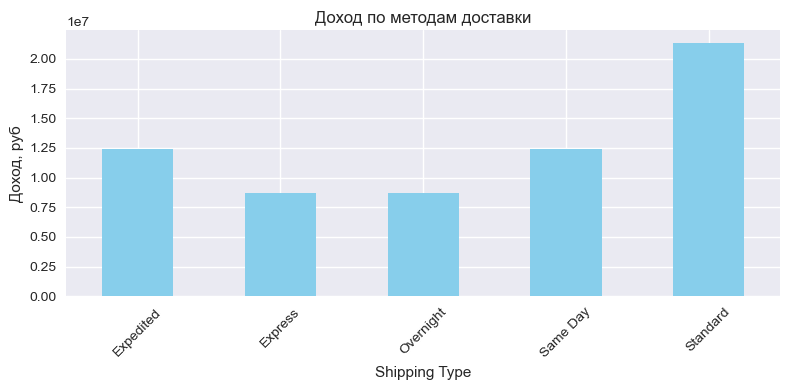

In [19]:
plt.figure(figsize=(8, 4))
delivery_revenue.plot(kind='bar', color='skyblue')
plt.title('Доход по методам доставки')
plt.ylabel('Доход, руб')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Доход по каждому типу продукта ('Product Type')
product_revenue = df.groupby('Product Type')['Total Price'].sum()

print("Доход по типам продуктов:")
product_revenue

Доход по типам продуктов:


Product Type
Headphones     4041400.24
Laptop        12296239.97
Smartphone    21516754.69
Smartwatch    14036273.06
Tablet        11712000.41
Name: Total Price, dtype: float64

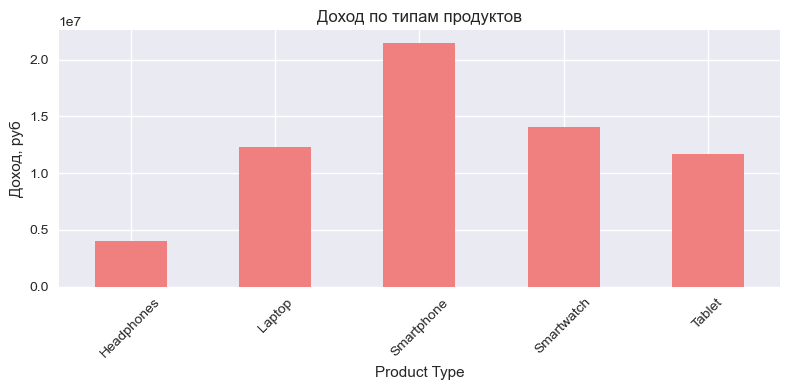

In [20]:
plt.figure(figsize=(8, 4))
product_revenue.plot(kind='bar', color='lightcoral')
plt.title('Доход по типам продуктов')
plt.ylabel('Доход, руб')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Доход от доп. услуг по месяцам
# Доп. услуги: 'Add-on Total'
accessory_monthly = df.groupby(['year', 'month'])['Add-on Total'].sum()

print("Доход от доп. услуг по месяцам:")
accessory_monthly.head(15)

Доход от доп. услуг по месяцам:


year  month
2023  9          8012.62
      10        37837.12
      11        34888.81
      12        33509.15
2024  1        136195.16
      2        120148.92
      3        124954.26
      4        123973.59
      5        132018.51
      6        126689.59
      7        132017.20
      8        135133.14
      9         99518.89
Name: Add-on Total, dtype: float64

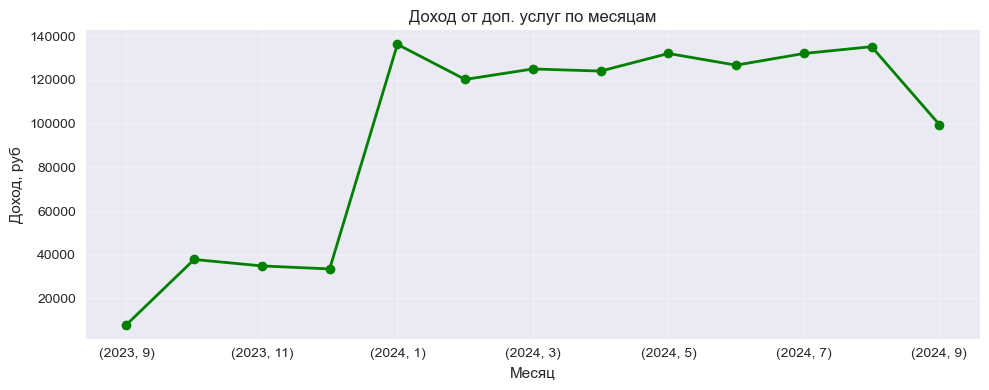

In [21]:
plt.figure(figsize=(10, 4))
accessory_monthly.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Доход от доп. услуг по месяцам')
plt.ylabel('Доход, руб')
plt.xlabel('Месяц')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Доход от доп. услуг по кварталам
accessory_quarterly = df.groupby(['year', 'quarter'])['Add-on Total'].sum()

print("Доход от доп. услуг по кварталам:")
accessory_quarterly

Доход от доп. услуг по кварталам:


year  quarter
2023  3            8012.62
      4          106235.08
2024  1          381298.34
      2          382681.69
      3          366669.23
Name: Add-on Total, dtype: float64

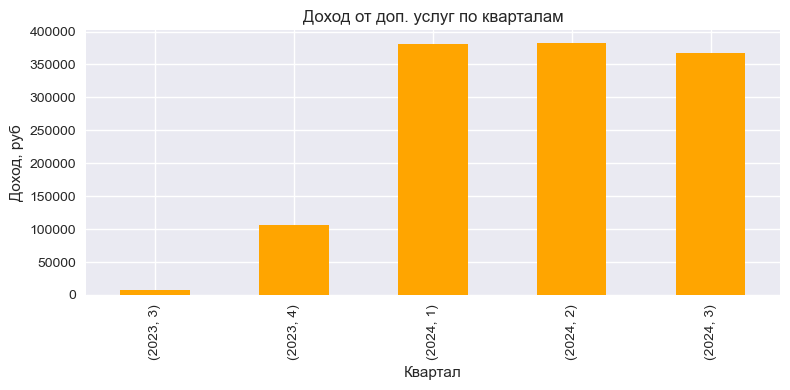

In [22]:
plt.figure(figsize=(8, 4))
accessory_quarterly.plot(kind='bar', color='orange')
plt.title('Доход от доп. услуг по кварталам')
plt.ylabel('Доход, руб')
plt.xlabel('Квартал')
plt.tight_layout()
plt.show()